# Task5 - To Explore Business Analytics

## Exploratory Data Analysis on SampleSuperstore Dataset

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data=pd.read_csv('SampleSuperstore.csv')

In [4]:
data.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [5]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
data.count()

Ship Mode       9994
Segment         9994
Country         9994
City            9994
State           9994
Postal Code     9994
Region          9994
Category        9994
Sub-Category    9994
Sales           9994
Quantity        9994
Discount        9994
Profit          9994
dtype: int64

In [8]:
data.shape

(9994, 13)

## Checking for null values

In [9]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [10]:
data['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [11]:
#dropping the Country because all data is from US
data.drop('Country', axis =1, inplace = True)

In [12]:
#dropping the Postal Code because same as City
data.drop('Postal Code', axis = 1, inplace = True)
data.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [13]:
data['City'].value_counts()

New York City        915
Los Angeles          747
Philadelphia         537
San Francisco        510
Seattle              428
                    ... 
Arlington Heights      1
Littleton              1
Jupiter                1
Lake Elsinore          1
Chapel Hill            1
Name: City, Length: 531, dtype: int64

In [14]:
#Total City 
data['City'].nunique()

531

In [15]:
#total State
data['State'].nunique()

49

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

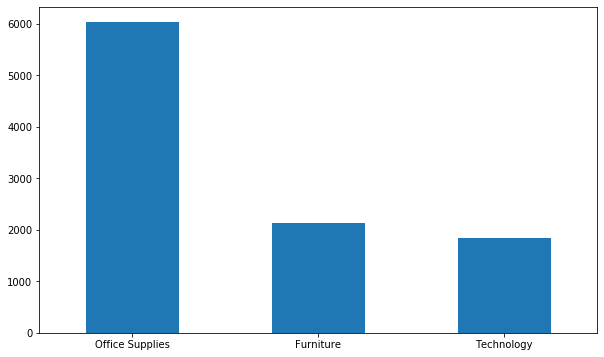

In [16]:
plt.figure(figsize = (10,6))
data['Category'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0)

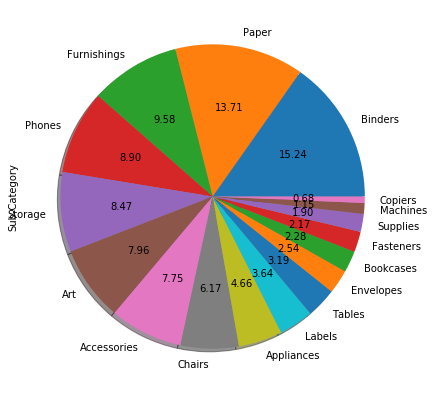

In [17]:
#Finding Which item is sale more in Sub_category
fig = plt.figure(figsize= (10,7))
data['Sub-Category'].value_counts().plot.pie(autopct = '%.2f',shadow = True)

Paper has the most sales in sub-category followed by Furnishings, Phones, Storage

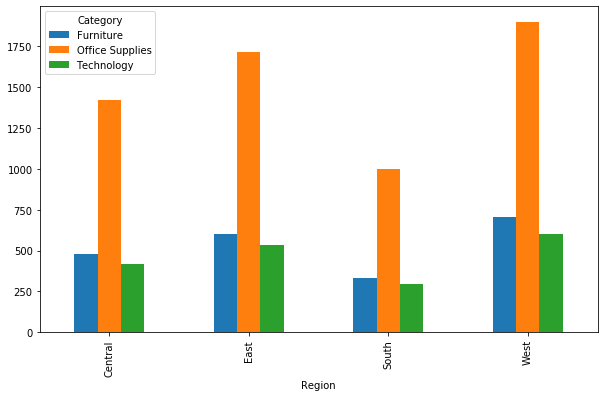

In [18]:
# Region VS Category
pd.crosstab(data['Region'],data['Category']).plot(kind = 'bar',figsize=(10,6))

For all regions, Office Supplies have the maximum sales. West US has maximum sales while South US have minimum sales

In [19]:
#adding profit column WITH PERCENTAGE
data['%_profit'] = data['Profit'] / data['Sales'] * 100
data.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,%_profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,16.00
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,30.00
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,47.00
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-40.00
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,11.25


In [20]:
print("MAXIMUM PROFIT")
max(data['%_profit'])

MAXIMUM PROFIT


50.0

In [21]:
print("MAXIMIM LOSS")
min(data['%_profit'])


MAXIMIM LOSS


-275.0

In [22]:
#checking total data less than zero
loss = data[data['%_profit'] < 0]
loss

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,%_profit
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-40.000000
14,Standard Class,Home Office,Fort Worth,Texas,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580,-180.000000
15,Standard Class,Home Office,Fort Worth,Texas,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160,-150.000000
23,Second Class,Consumer,Philadelphia,Pennsylvania,East,Furniture,Chairs,71.3720,2,0.30,-1.0196,-1.428571
27,Standard Class,Consumer,Philadelphia,Pennsylvania,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522,-54.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
9920,Standard Class,Corporate,Bryan,Texas,Central,Office Supplies,Binders,22.3860,7,0.80,-35.8176,-160.000000
9921,Standard Class,Home Office,Akron,Ohio,East,Office Supplies,Binders,5.7420,3,0.70,-4.5936,-80.000000
9931,Standard Class,Consumer,San Bernardino,California,West,Furniture,Bookcases,683.3320,4,0.15,-40.1960,-5.882353
9937,Second Class,Corporate,Los Angeles,California,West,Furniture,Tables,71.0880,2,0.20,-1.7772,-2.500000


In [23]:
print("Total size of Loss data ")
loss.shape

Total size of Loss data 


(1871, 12)

In [24]:
print("total size of data")
data.shape

total size of data


(9994, 12)

In [25]:
#calculating loss in data
1871/9994 * 100

18.721232739643785

Around 18% of data is loss

## City wise profit

In [26]:
profit_city = data.groupby("City").sum()['Profit']
profit_city

City
Aberdeen          6.6300
Abilene          -3.7584
Akron          -186.6356
Albuquerque     634.0881
Alexandria      318.6183
                 ...    
Woonsocket       78.6791
Yonkers        2767.7557
York           -102.1692
Yucaipa          13.2080
Yuma           -465.9909
Name: Profit, Length: 531, dtype: float64

In [27]:
profit_city.sort_values(ascending = False).head()

City
New York City    62036.9837
Los Angeles      30440.7579
Seattle          29156.0967
San Francisco    17507.3854
Detroit          13181.7908
Name: Profit, dtype: float64

In [28]:
profit_city.sort_values(ascending = False).head()

City
New York City    62036.9837
Los Angeles      30440.7579
Seattle          29156.0967
San Francisco    17507.3854
Detroit          13181.7908
Name: Profit, dtype: float64

Cities which have the maximum loss

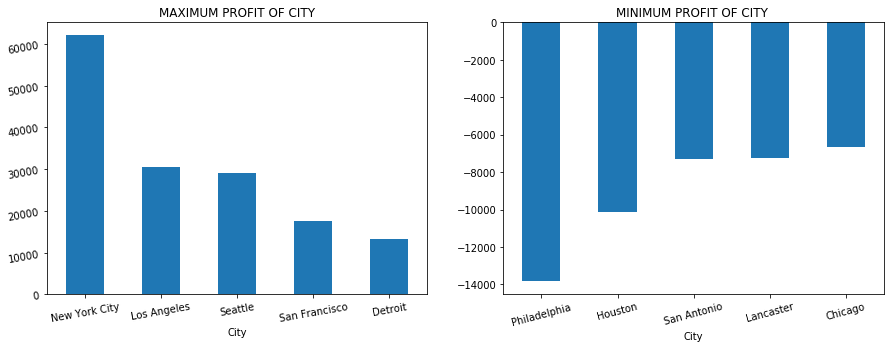

In [29]:
#plotting
fig,axes = plt.subplots(1,2, figsize = (15,5))
profit_city.sort_values(ascending = False).head().plot(kind ='bar', ax = axes[0])
axes[0].tick_params(labelrotation = 10)
axes[0].set_title("MAXIMUM PROFIT OF CITY")

profit_city.sort_values(ascending = True).head().plot(kind='bar',ax = axes[1])
plt.xticks(rotation = 15)
plt.title("MINIMUM PROFIT OF CITY ")

plt.show()

New York City has maximum profit and Philadelphia has maximum loss

## State wise profit

In [30]:
#STATE wise profit distributiom
state_profit = data.groupby('State').sum()['Profit']

Text(0.5, 1.0, 'STATE WISE PROFIT')

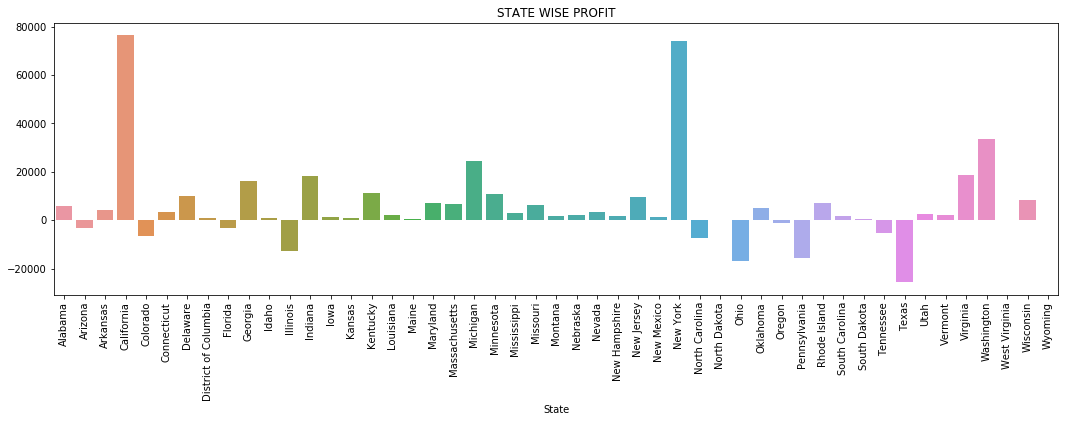

In [31]:
plt.figure(figsize =(18,5))
sns.barplot(x = state_profit.index, y=state_profit.values)
plt.xticks(rotation =90)
plt.title("STATE WISE PROFIT")

According to the barplot, California has the maximum profit while Virginia has the minimum profit

In [32]:
state_profit.sort_values(ascending = False).head(5)

State
California    76381.3871
New York      74038.5486
Washington    33402.6517
Michigan      24463.1876
Virginia      18597.9504
Name: Profit, dtype: float64

In [33]:
# converting the dataframe
df_state_profit = pd.DataFrame(state_profit)
type(df_state_profit)

pandas.core.frame.DataFrame

## Region wise profit

In [34]:
region_profit = pd.DataFrame(data.groupby('Region').sum()['Profit'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """Entry point for launching an IPython kernel.


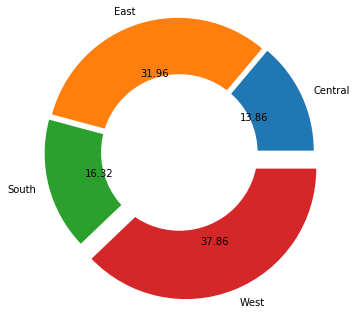

In [35]:
plt.pie(region_profit, labels = region_profit.index, autopct= "%.2f", explode = (0.05,0.05,0.05,0.20),radius=1.5)

centre_circle = plt.Circle((0,0), 0.90, fc = 'white')
fig= plt.gcf()
fig.gca().add_artist(centre_circle)

East Region has the most profit

## City wise sales

In [36]:
city_sale = pd.DataFrame(data.groupby('City').sum()['Sales'])
city_sale_sort = city_sale.sort_values(by= 'Sales',ascending = False).head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """Entry point for launching an IPython kernel.


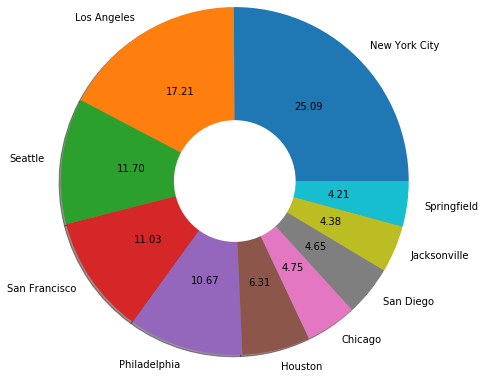

In [37]:
plt.pie(city_sale_sort, labels = city_sale_sort.index, autopct= "%.2f",shadow = True, radius = 2)

centre_circle = plt.Circle((0,0), 0.70, fc = 'white')
fig= plt.gcf()
fig.gca().add_artist(centre_circle)

From the pie chart, it is clear that New York City has maximum sales followed by Los Angeles while Springfield has the minimum sales.

## State wise sales

In [38]:
state_sale = pd.DataFrame(data.groupby('State').sum()['Sales'])
state_sale_sort =state_sale.sort_values(by= 'Sales',ascending = False).head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """Entry point for launching an IPython kernel.


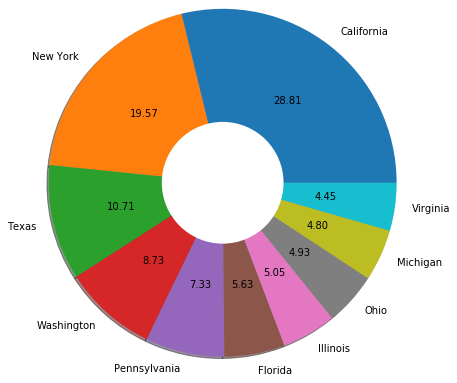

In [39]:
plt.pie(state_sale_sort, labels = state_sale_sort.index, autopct= "%.2f",shadow = True, radius = 2)

centre_circle = plt.Circle((0,0), 0.70, fc = 'white')
fig= plt.gcf()
fig.gca().add_artist(centre_circle)

From the State wise Sales, we got to see that California acquired the first position and Virginia is at the bottom of the list

## Region wise sales

In [40]:
region_sale = pd.DataFrame(data.groupby('Region').sum()['Sales'])
region_sale_sort =region_sale.sort_values(by= 'Sales',ascending = False).head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """Entry point for launching an IPython kernel.


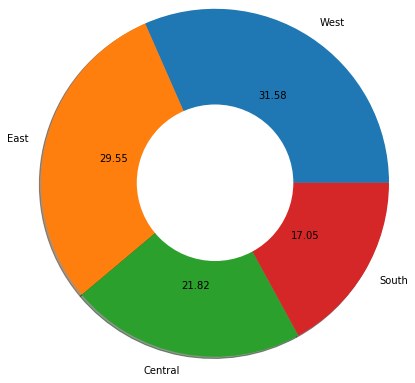

In [41]:
plt.pie(region_sale_sort, labels = region_sale_sort.index, autopct= "%.2f",shadow = True, radius = 2)
centre_circle = plt.Circle((0,0), 0.90, fc = 'white')
fig= plt.gcf()
fig.gca().add_artist(centre_circle)

As per the Rregion Wise Sales, West region has maximum sales with 31.58 followed by East with 29.55, Central with 21.82 and South region has minimum sales with 17.05

In [42]:
data.duplicated().sum()

50

## Dropping duplicates values

In [43]:
data.drop_duplicates(keep='first',inplace=True)

## Heatmap: To represent correlation between entities

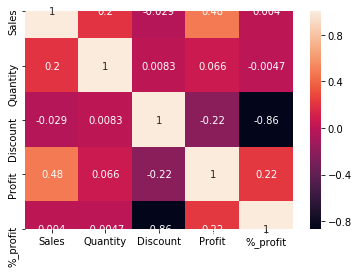

In [44]:
corr=data.corr()
sns.heatmap(corr,annot=True)

In [45]:
s1=pd.Series(np.array(data['City']))
print(s1.describe())

count              9944
unique              531
top       New York City
freq                906
dtype: object


In [46]:
s2=pd.Series(np.array(data['Category']))
print(s2.describe())

count                9944
unique                  3
top       Office Supplies
freq                 5986
dtype: object


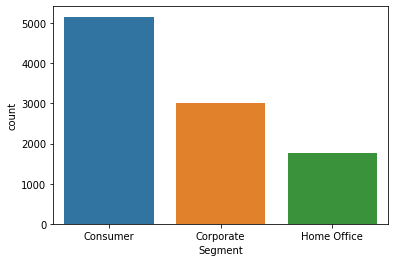

In [47]:
sns.countplot(data['Segment'])
plt.show()

## Histogram

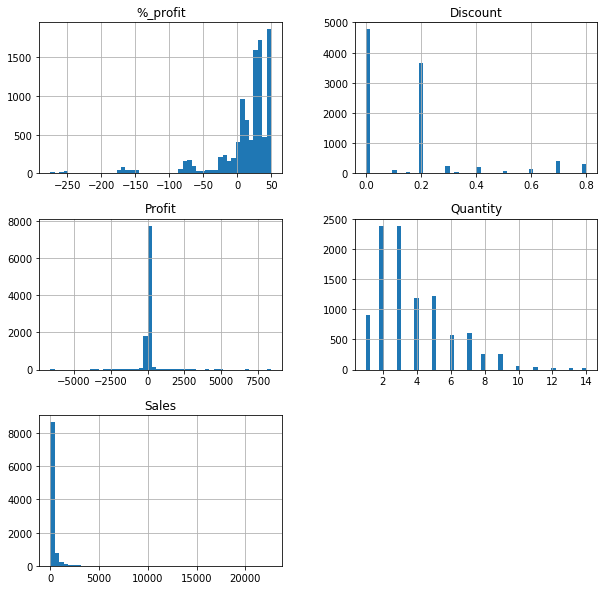

In [48]:
data.hist(figsize=(10,10),bins=50)
plt.show()

In [49]:
data1 = data[['City','Category', 'State','Sales','Profit']]
# pandas pivot with multiple variables
heatmap1_data = pd.pivot_table(data1,values='Sales', index=["City"], columns='Category')

## Heatmap of sales in every city by category

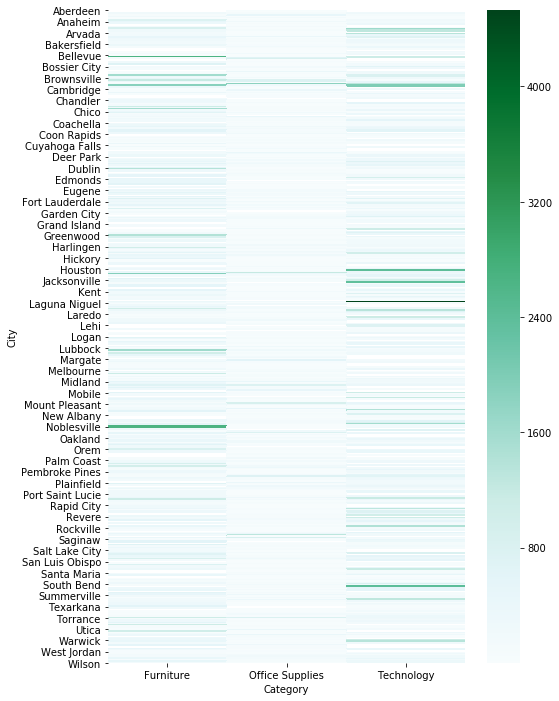

In [50]:
plt.figure(figsize=(8, 12))
sns.heatmap(heatmap1_data, cmap="BuGn")

## Heatmap of sales in every State by category

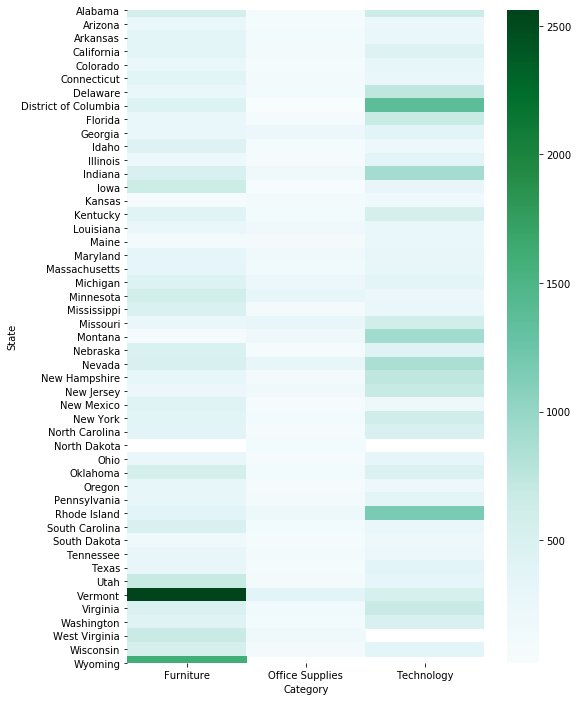

In [51]:
heatmap2_data = pd.pivot_table(data1,values='Sales', index=["State"], columns='Category')
plt.figure(figsize=(8, 12))
sns.heatmap(heatmap2_data, cmap="BuGn")

## Heatmap of profits in every state by category

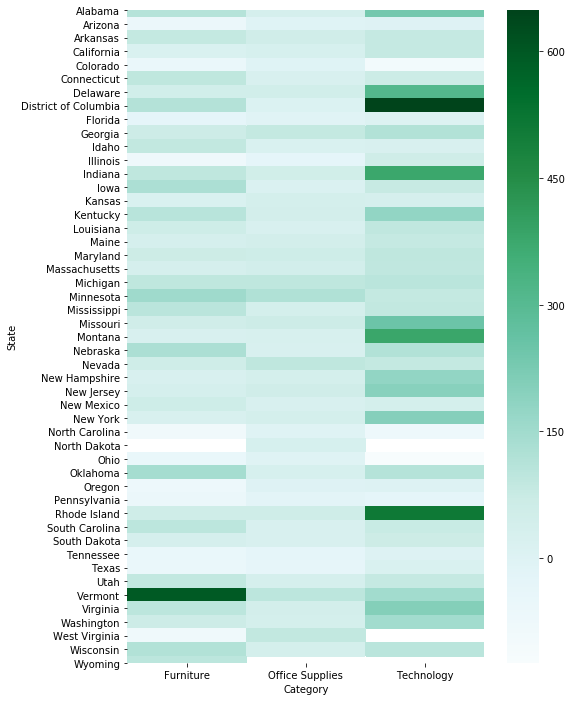

In [52]:
heatmap3_data = pd.pivot_table(data1,values='Profit', index=["State"], columns='Category')
plt.figure(figsize=(8, 12))
sns.heatmap(heatmap3_data, cmap="BuGn")

## Heatmap of profit in every city by category

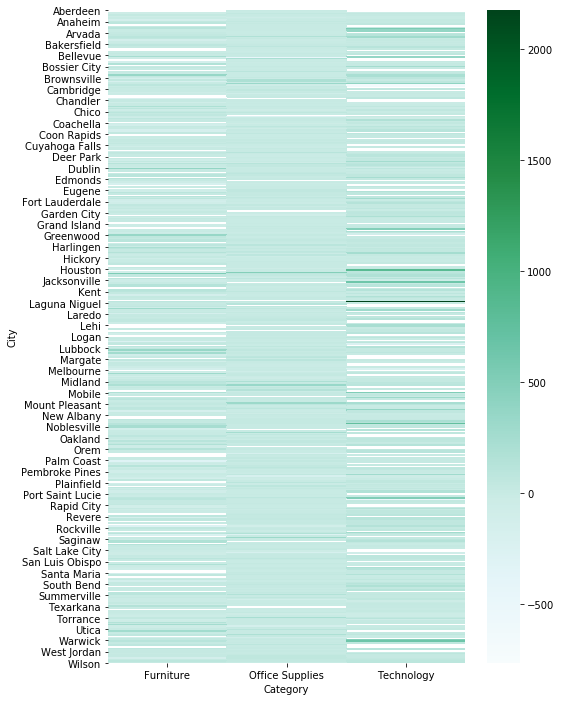

In [53]:
heatmap4_data = pd.pivot_table(data1,values='Profit', index=["City"], columns='Category')
plt.figure(figsize=(8, 12))
sns.heatmap(heatmap4_data, cmap="BuGn")

## Heatmap of profit in every city by segment

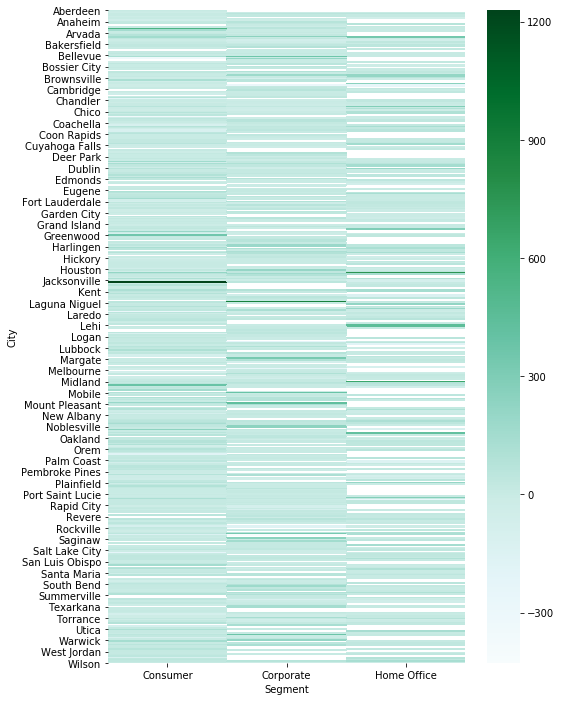

In [54]:
heatmap5_data = pd.pivot_table(data,values='Profit', index=["City"], columns='Segment')
plt.figure(figsize=(8, 12))
sns.heatmap(heatmap5_data, cmap="BuGn")

## Heatmap of profits in every state by segment

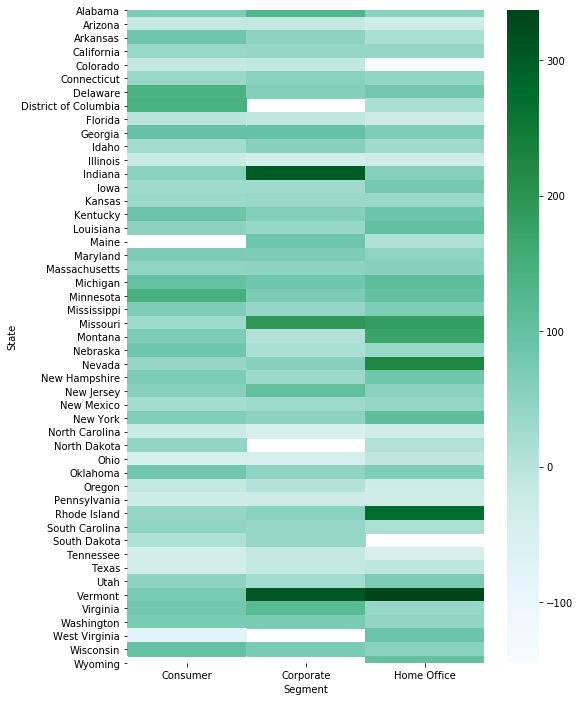

In [55]:

heatmap6_data = pd.pivot_table(data,values='Profit', index=["State"], columns='Segment')
plt.figure(figsize=(8, 12))
sns.heatmap(heatmap6_data, cmap="BuGn")

## Heatmap of sales in every state by segment

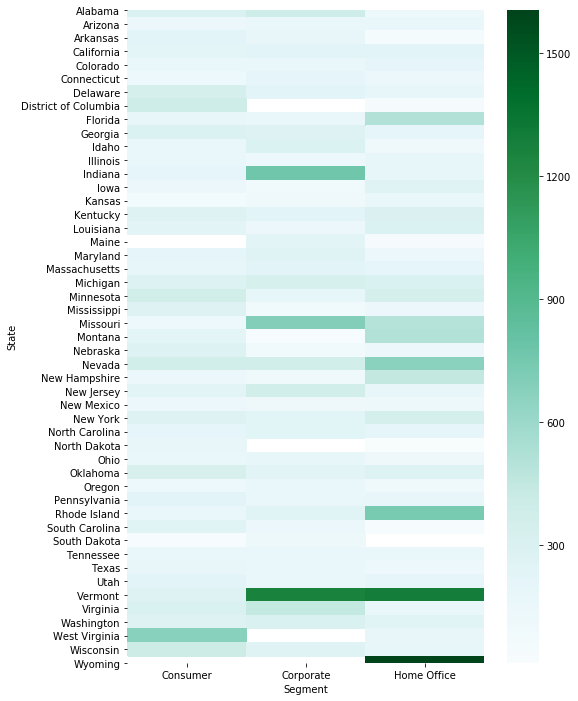

In [56]:
heatmap7_data = pd.pivot_table(data,values='Sales', index=["State"], columns='Segment')
plt.figure(figsize=(8, 12))
sns.heatmap(heatmap7_data, cmap="BuGn")

## Heatmap of sales in every city by segment

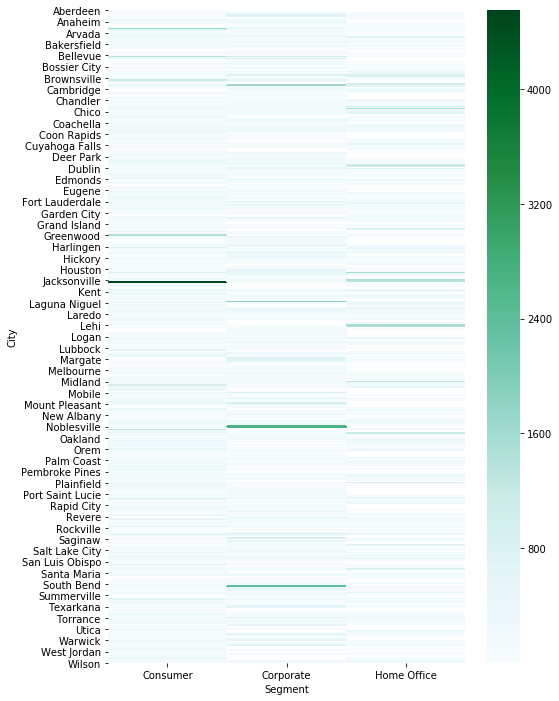

In [57]:
heatmap8_data = pd.pivot_table(data,values='Sales', index=["City"], columns='Segment')
plt.figure(figsize=(8, 12))
sns.heatmap(heatmap8_data, cmap="BuGn")

## Heatmap of sales in every city by sub-category

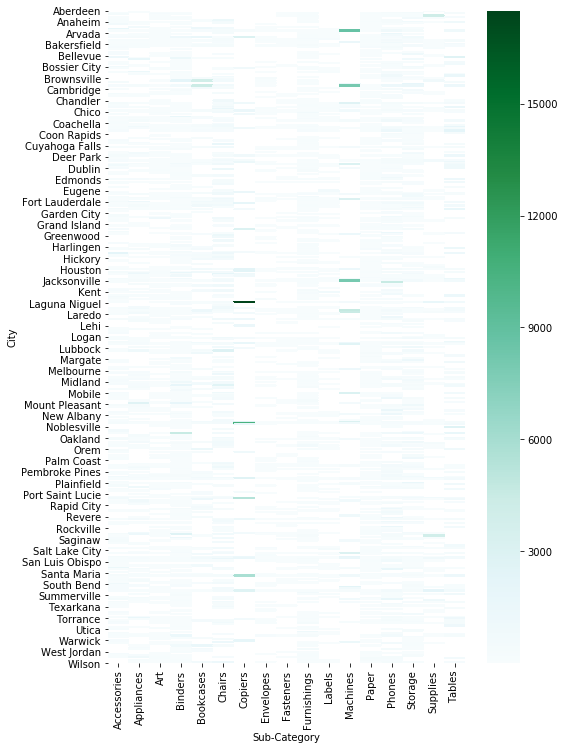

In [58]:
heatmap9_data = pd.pivot_table(data,values='Sales', index=["City"], columns='Sub-Category')
plt.figure(figsize=(8, 12))
sns.heatmap(heatmap9_data, cmap="BuGn")

## Heatmap of sales in every state by sub-category

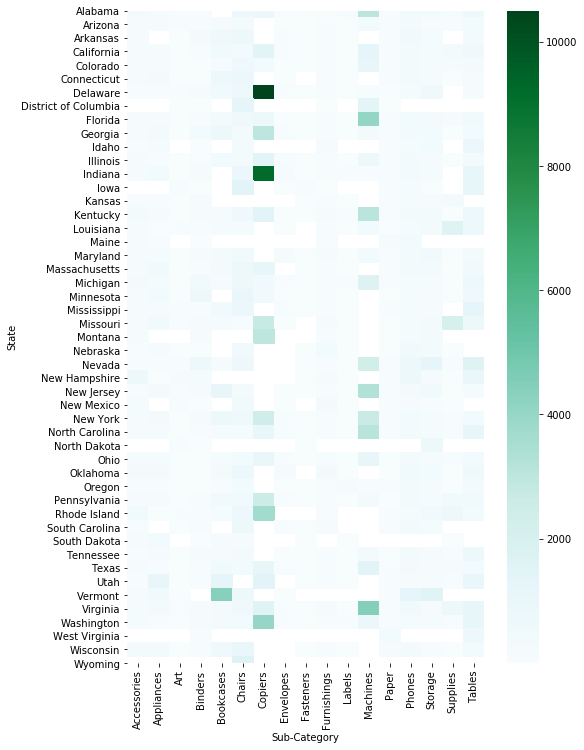

In [59]:
heatmap10_data = pd.pivot_table(data,values='Sales', index=["State"], columns='Sub-Category')
plt.figure(figsize=(8, 12))
sns.heatmap(heatmap10_data, cmap="BuGn")

## Heatmap of profit in every state by sub-category

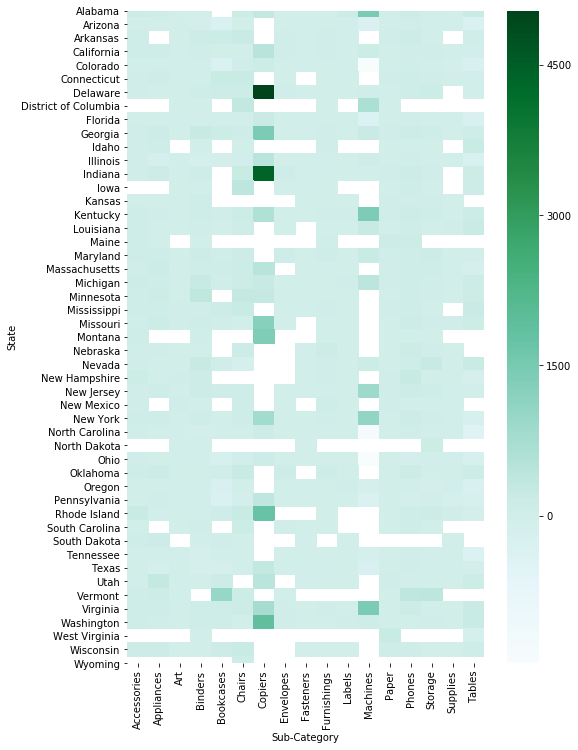

In [60]:
heatmap11_data = pd.pivot_table(data,values='Profit', index=["State"], columns='Sub-Category')
plt.figure(figsize=(8, 12))
sns.heatmap(heatmap11_data, cmap="BuGn")

## Profits and sales per sub-category

<Figure size 792x504 with 0 Axes>

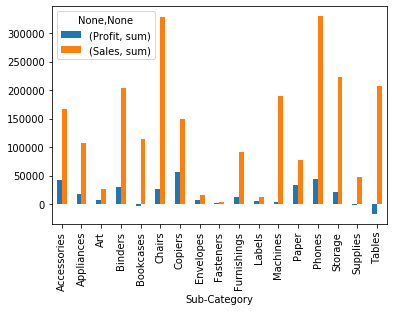

In [61]:
plt.figure(figsize=(11,7))
data.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.show()